# Importing Libraries


In [129]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import talib as ta
# 1. Import yfinance and other necessary libraries
import yfinance as yf
import datetime
import seaborn as sns
import matplotlib.dates as mdates

In [130]:
# Set the style of the seaborn plot
sns.set(style="whitegrid")

# Importing Data and Visualization

[*********************100%%**********************]  1 of 1 completed


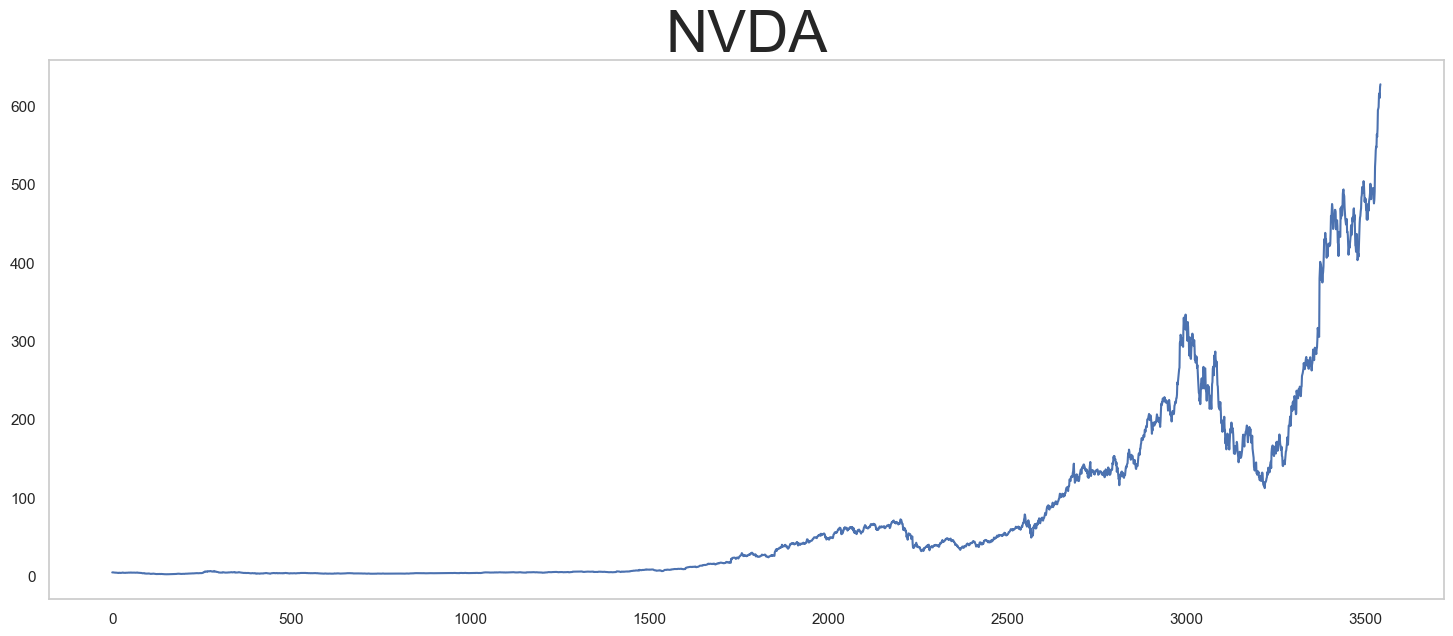

In [131]:
symb = "NVDA"
# Define today's date
end_date = datetime.datetime.now().strftime('%Y-%m-%d')

df = yf.download(symb, start="2010-01-01", end=end_date, interval="1d")
plt.figure(figsize=(18,7))
df.dropna(inplace=True)
df = df.reset_index(drop=True)
plt.plot(df['Close'] )
plt.title(symb,size=42)
plt.grid()
plt.show()

# Stochastic_Indicator 

In [132]:
df['K_line'], df['D_line'] = ta.STOCH(df['High'],df['Low'],df['Close'], fastk_period=5, slowk_period=3, slowk_matype=0, slowd_period=3, slowd_matype=0)
df.dropna(inplace=True)

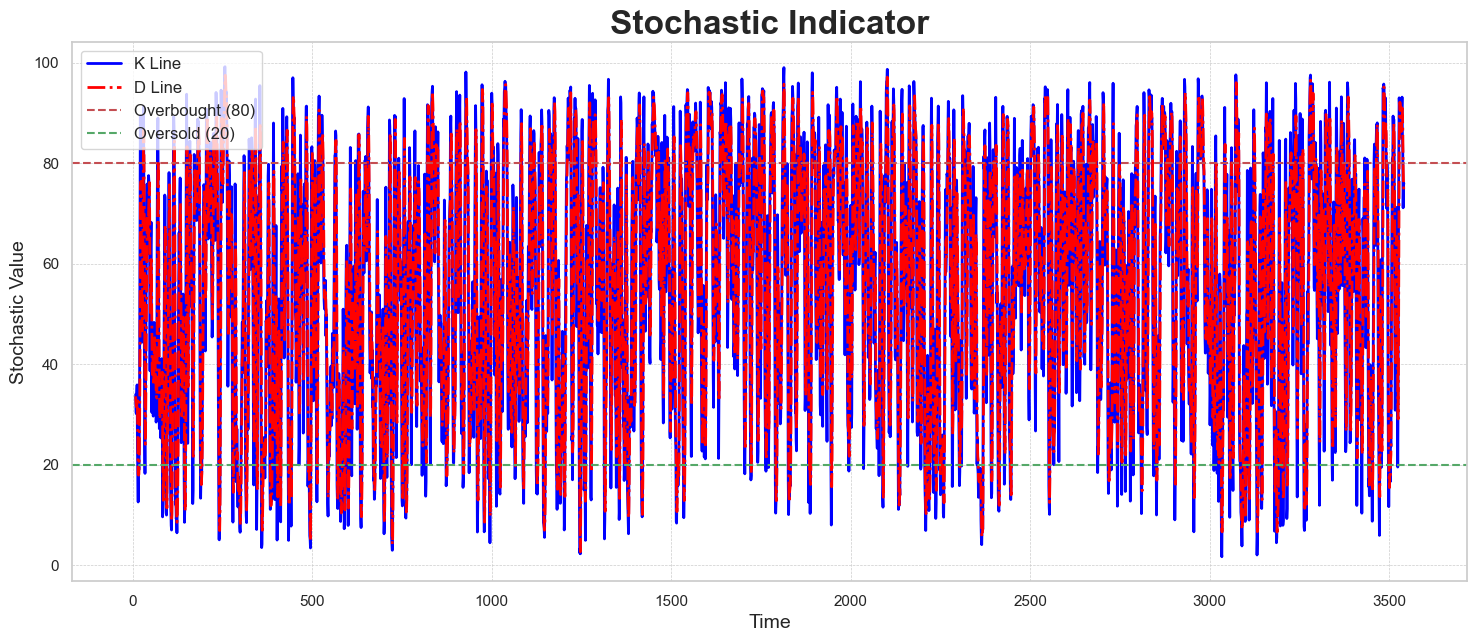

In [133]:
plt.figure(figsize=(18, 7))

# Plotting the lines with enhanced style
plt.plot(df['K_line'], color='blue', label='K Line', linewidth=2, linestyle='-')
plt.plot(df['D_line'], color='red', label='D Line', linewidth=2, linestyle='-.')

# Adding horizontal lines for overbought and oversold levels
plt.axhline(y=80, color='r', linestyle='--', linewidth=1.5, label='Overbought (80)')
plt.axhline(y=20, color='g', linestyle='--', linewidth=1.5, label='Oversold (20)')

# Enhancing legend and title
plt.legend(loc='upper left', fontsize=12, frameon=True)
plt.title('Stochastic Indicator', fontsize=24, fontweight='bold')

# Fine-tuning grid and axes
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.xlabel('Time', fontsize=14)
plt.ylabel('Stochastic Value', fontsize=14)

# Show the plot
plt.show()

# Empty Arrays

In [134]:
buy=[]
sell=[]
Profit=[]
Stop_loss=[]
position_Buy=None
position_Sell=None
# Ensure df index is reset
df = df.reset_index(drop=True)

# Decision Making

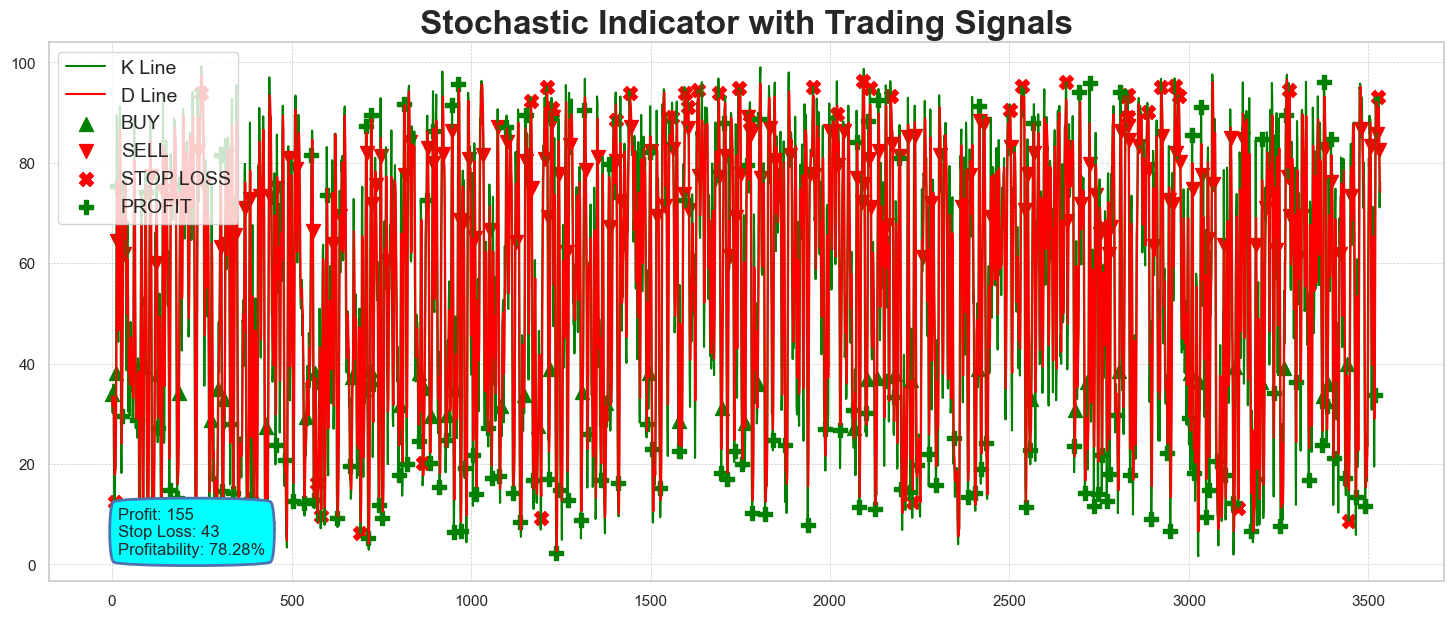

Profit = 155
Stop_loss = 43
PROFITIBLITY 78.28282828282829


In [135]:
for i in range(len(df)):
######################################SIGNAL FOR BUY#######################################################

    if df['K_line'][i]>df['D_line'][i] and df['K_line'][i]<=40 and df['D_line'][i]<=40 and df['K_line'][i]>25 and df['D_line'][i]>25 and position_Buy!="Buy" and position_Sell!="Sell" :
        buy.append(df['K_line'][i])
        sell.append(np.nan)
        Stop_loss.append(np.nan)
        Profit.append(np.nan)
        position_Buy="Buy"
            


######################################SIGNAL FOR SELL#######################################################
 
    elif df['K_line'][i]<df['D_line'][i] and df['K_line'][i]>=60 and df['D_line'][i]>=60 and df['K_line'][i]<90 and df['D_line'][i]<90 and position_Sell!="Sell" and position_Buy!="Buy":
        sell.append(df['K_line'][i])
        buy.append(np.nan)
        Stop_loss.append(np.nan)
        Profit.append(np.nan)
        position_Sell="Sell"
            
     

######################################SIGNAL FOR BUY_macd#######################################################
    elif position_Buy=="Buy" :
        if df['D_line'][i]>=70 :
            Stop_loss.append(np.nan)
            Profit.append(df['K_line'][i])
            buy.append(np.nan)
            sell.append(np.nan)
            position_Buy=None
            
            
        elif df['D_line'][i]<=20 :
            Stop_loss.append(df['K_line'][i])
            Profit.append(np.nan)
            buy.append(np.nan)
            sell.append(np.nan)
            position_Buy=None
            
        else:
            buy.append(np.nan)
            sell.append(np.nan)
            Stop_loss.append(np.nan)
            Profit.append(np.nan)
######################################SIGNAL FOR SELL_macd#######################################################
    elif position_Sell=="Sell":
        if df['D_line'][i]<=30:
            Stop_loss.append(np.nan)
            Profit.append(df['K_line'][i])
            buy.append(np.nan)
            sell.append(np.nan)
            position_Sell=None
            
        elif df['D_line'][i]>=90:
            Stop_loss.append(df['K_line'][i])
            Profit.append(np.nan)
            buy.append(np.nan)
            sell.append(np.nan)
            position_Sell=None
            
        else:
            buy.append(np.nan)
            sell.append(np.nan)
            Stop_loss.append(np.nan)
            Profit.append(np.nan)
    else:
            buy.append(np.nan)
            sell.append(np.nan)
            Stop_loss.append(np.nan)
            Profit.append(np.nan)
           
df['buy']=buy
df['sell']=sell
df['Stop_loss']=Stop_loss
df['Profit']=Profit
plt.figure(figsize=(18,7))
####################################################Visualization###################################
# Plotting the Stochastic lines
plt.plot(df['K_line'], color='green', label='K Line')
plt.plot(df['D_line'], color='red', label='D Line')

# Scatter plots for Buy, Sell, Stop Loss, and Profit signals
plt.scatter(df.index, df['buy'], marker='^', color='green', s=100, label='BUY')
plt.scatter(df.index, df['sell'], marker='v', color='red', s=100, label='SELL')
plt.scatter(df.index, df['Stop_loss'], marker='X', color='red', s=100, label='STOP LOSS')
plt.scatter(df.index, df['Profit'], marker='P', color='green', s=100, label='PROFIT')

# Enhancing legend and title
plt.legend(loc='upper left', fontsize=14)
plt.title('Stochastic Indicator with Trading Signals', fontsize=24, fontweight='bold')

# Adding grid
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Calculating and annotating profitability metrics
profit_count = df['Profit'].count()
stop_loss_count = df['Stop_loss'].count()
profitability = (profit_count / (profit_count + stop_loss_count)) * 100
plt.annotate(f'Profit: {profit_count}\nStop Loss: {stop_loss_count}\nProfitability: {profitability:.2f}%',
             xy=(0.05, 0.05), xycoords='axes fraction', fontsize=12,
             bbox=dict(boxstyle="round4,pad=0.6", fc="cyan", ec="b", lw=2))

plt.show()
print('Profit =',df['Profit'].count())
print('Stop_loss =',df['Stop_loss'].count())
print(f"PROFITIBLITY {(df['Profit'].count()/(df['Profit'].count()+df['Stop_loss'].count()))*100}")


In [136]:
buy=[]
sell=[]
Profit=[]
Stop_loss=[]
position_Buy=None
position_Sell=None

Profit = 155
Stop_loss = 43
PROFITIBLITY 78.28282828282829


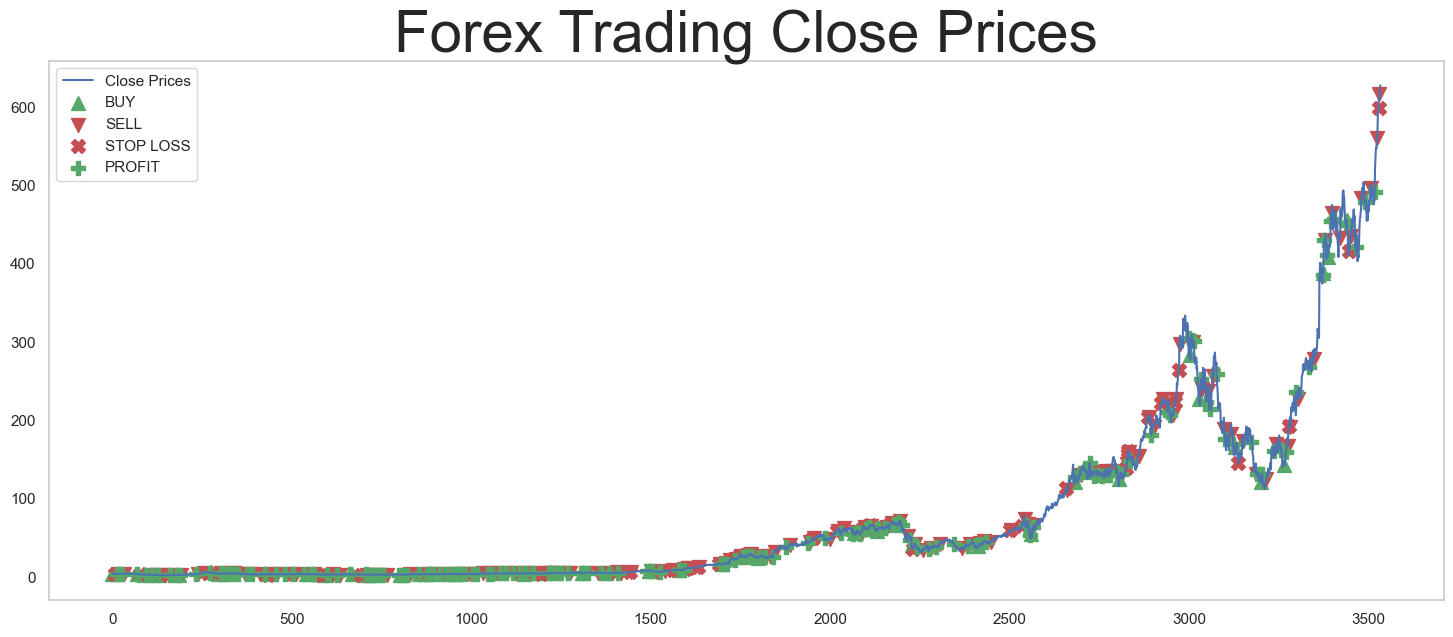

In [137]:
for i in range(len(df)):
######################################SIGNAL FOR BUY#######################################################

    if df['K_line'][i]>df['D_line'][i] and df['K_line'][i]<=40 and df['D_line'][i]<=40 and df['K_line'][i]>25 and df['D_line'][i]>25 and position_Buy!="Buy" and position_Sell!="Sell" :
        buy.append(df['Close'][i])
        sell.append(np.nan)
        Stop_loss.append(np.nan)
        Profit.append(np.nan)
        position_Buy="Buy"
            


######################################SIGNAL FOR SELL#######################################################
 
    elif df['K_line'][i]<df['D_line'][i] and df['K_line'][i]>=60 and df['D_line'][i]>=60 and df['K_line'][i]<90 and df['D_line'][i]<90 and position_Sell!="Sell" and position_Buy!="Buy":
        sell.append(df['Close'][i])
        buy.append(np.nan)
        Stop_loss.append(np.nan)
        Profit.append(np.nan)
        position_Sell="Sell"
            
     

######################################SIGNAL FOR BUY_stoc#######################################################
    elif position_Buy=="Buy" :
        if df['D_line'][i]>=70 :
            Stop_loss.append(np.nan)
            Profit.append(df['Close'][i])
            buy.append(np.nan)
            sell.append(np.nan)
            position_Buy=None
            
            
        elif df['D_line'][i]<=20 :
            Stop_loss.append(df['Close'][i])
            Profit.append(np.nan)
            buy.append(np.nan)
            sell.append(np.nan)
            position_Buy=None
            
        else:
            buy.append(np.nan)
            sell.append(np.nan)
            Stop_loss.append(np.nan)
            Profit.append(np.nan)
######################################SIGNAL FOR SELL_stock#######################################################
    elif position_Sell=="Sell":
        if df['D_line'][i]<=30:
            Stop_loss.append(np.nan)
            Profit.append(df['Close'][i])
            buy.append(np.nan)
            sell.append(np.nan)
            position_Sell=None
            
        elif df['D_line'][i]>=90:
            Stop_loss.append(df['Close'][i])
            Profit.append(np.nan)
            buy.append(np.nan)
            sell.append(np.nan)
            position_Sell=None
            
        else:
            buy.append(np.nan)
            sell.append(np.nan)
            Stop_loss.append(np.nan)
            Profit.append(np.nan)
    else:
            buy.append(np.nan)
            sell.append(np.nan)
            Stop_loss.append(np.nan)
            Profit.append(np.nan)
           
df['buy']=buy
df['sell']=sell
df['Stop_loss']=Stop_loss
df['Profit']=Profit
###############################################Visualization########################################
plt.figure(figsize=(18,7))
plt.plot(df['Close'],label='Close Prices')
plt.scatter(df.index,df['buy'],marker='^',color='g',s=100,label='BUY')
plt.scatter(df.index,df['sell'],marker="v",color='r',s=100,label='SELL')
plt.scatter(df.index,df['Stop_loss'],marker='X',color='r',s=100,label='STOP LOSS')
plt.scatter(df.index,df['Profit'],marker='P',color='g',s=100,label='PROFIT')
plt.legend()
plt.title('Forex Trading Close Prices',size=42)
plt.grid()
print('Profit =',df['Profit'].count())
print('Stop_loss =',df['Stop_loss'].count())
print(f"PROFITIBLITY {(df['Profit'].count()/(df['Profit'].count()+df['Stop_loss'].count()))*100}")

In [138]:
# NSE
df = pd.read_csv('C:\\Users\\Daniel aghanya\\Pictures\\tiktok download\\Final_Year_Project-main\\Uni project\\NSE All Share Historical Data.csv')
df.dropna(inplace=True)
df = df.iloc[::-1].reset_index(drop=True)
# Converting 'Price', 'High', and 'Low' columns to float
df['Price'] = df['Price'].str.replace(',', '').astype(float)
df['High'] = df['High'].str.replace(',', '').astype(float)
df['Low'] = df['Low'].str.replace(',', '').astype(float)
df['Close'] = df['Price']  # Assuming 'Close' is same as 'Price'

df.head()

,Date,Price,Open,High,Low,Vol.,Change %,Close
0,23/09/2015,30543.17,"30,426.78",30560.93,30425.31,466.94M,0.38%,30543.17
1,30/08/2016,27493.12,"27,368.41",27517.13,27364.18,230.13M,0.46%,27493.12
2,31/08/2016,27599.03,"27,493.12",27612.13,27487.20,262.61M,0.39%,27599.03
3,01/09/2016,28419.92,"27,599.03",28421.27,27599.03,229.23M,2.97%,28419.92
4,02/09/2016,27756.67,"28,419.92",28488.00,27744.76,309.45M,-2.33%,27756.67


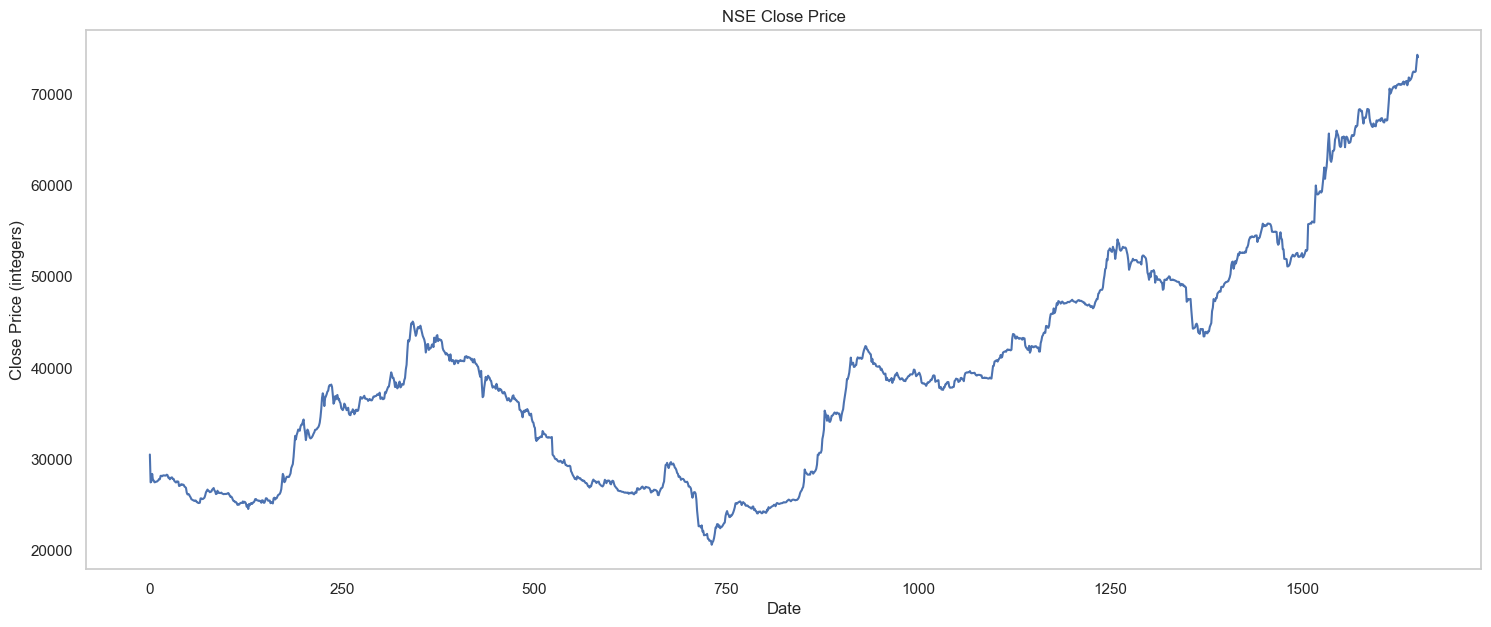

In [139]:
# Plot the Close price
plt.figure(figsize=(18,7))
plt.plot(df['Close'])
plt.title('NSE Close Price')
plt.xlabel('Date')
plt.ylabel('Close Price (integers)')
plt.grid()
plt.show()

In [140]:
df['K_line'], df['D_line'] = ta.STOCH(df['High'],df['Low'],df['Close'], fastk_period=5, slowk_period=3, slowk_matype=0, slowd_period=3, slowd_matype=0)
df.dropna(inplace=True)

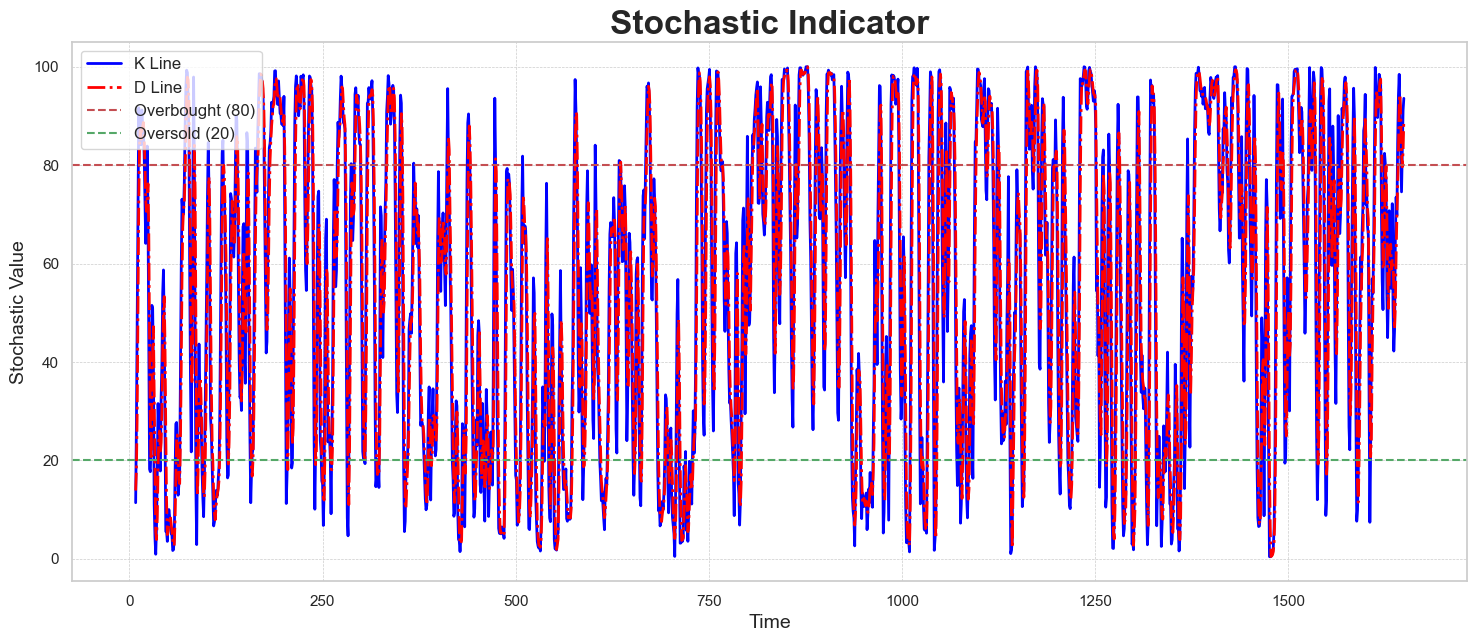

In [141]:
plt.figure(figsize=(18, 7))

# Plotting the lines with enhanced style
plt.plot(df['K_line'], color='blue', label='K Line', linewidth=2, linestyle='-')
plt.plot(df['D_line'], color='red', label='D Line', linewidth=2, linestyle='-.')

# Adding horizontal lines for overbought and oversold levels
plt.axhline(y=80, color='r', linestyle='--', linewidth=1.5, label='Overbought (80)')
plt.axhline(y=20, color='g', linestyle='--', linewidth=1.5, label='Oversold (20)')

# Enhancing legend and title
plt.legend(loc='upper left', fontsize=12, frameon=True)
plt.title('Stochastic Indicator', fontsize=24, fontweight='bold')

# Fine-tuning grid and axes
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.xlabel('Time', fontsize=14)
plt.ylabel('Stochastic Value', fontsize=14)

# Show the plot
plt.show()

In [142]:
buy=[]
sell=[]
Profit=[]
Stop_loss=[]
position_Buy=None
position_Sell=None
df = df.reset_index(drop=True)

In [143]:
for i in range(len(df)):
######################################SIGNAL FOR BUY#######################################################

    if df['K_line'][i]>df['D_line'][i] and df['K_line'][i]<=40 and df['D_line'][i]<=40 and df['K_line'][i]>25 and df['D_line'][i]>25 and position_Buy!="Buy" and position_Sell!="Sell" :
        buy.append(df['K_line'][i])
        sell.append(np.nan)
        Stop_loss.append(np.nan)
        Profit.append(np.nan)
        position_Buy="Buy"
            


######################################SIGNAL FOR SELL#######################################################
 
    elif df['K_line'][i]<df['D_line'][i] and df['K_line'][i]>=60 and df['D_line'][i]>=60 and df['K_line'][i]<90 and df['D_line'][i]<90 and position_Sell!="Sell" and position_Buy!="Buy":
        sell.append(df['K_line'][i])
        buy.append(np.nan)
        Stop_loss.append(np.nan)
        Profit.append(np.nan)
        position_Sell="Sell"
            
     

######################################SIGNAL FOR BUY_macd#######################################################
    elif position_Buy=="Buy" :
        if df['D_line'][i]>=70 :
            Stop_loss.append(np.nan)
            Profit.append(df['K_line'][i])
            buy.append(np.nan)
            sell.append(np.nan)
            position_Buy=None
            
            
        elif df['D_line'][i]<=20 :
            Stop_loss.append(df['K_line'][i])
            Profit.append(np.nan)
            buy.append(np.nan)
            sell.append(np.nan)
            position_Buy=None
            
        else:
            buy.append(np.nan)
            sell.append(np.nan)
            Stop_loss.append(np.nan)
            Profit.append(np.nan)
######################################SIGNAL FOR SELL_macd#######################################################
    elif position_Sell=="Sell":
        if df['D_line'][i]<=30:
            Stop_loss.append(np.nan)
            Profit.append(df['K_line'][i])
            buy.append(np.nan)
            sell.append(np.nan)
            position_Sell=None
            
        elif df['D_line'][i]>=90:
            Stop_loss.append(df['K_line'][i])
            Profit.append(np.nan)
            buy.append(np.nan)
            sell.append(np.nan)
            position_Sell=None
            
        else:
            buy.append(np.nan)
            sell.append(np.nan)
            Stop_loss.append(np.nan)
            Profit.append(np.nan)
    else:
            buy.append(np.nan)
            sell.append(np.nan)
            Stop_loss.append(np.nan)
            Profit.append(np.nan)
           
df['buy']=buy
df['sell']=sell
df['Stop_loss']=Stop_loss
df['Profit']=Profit

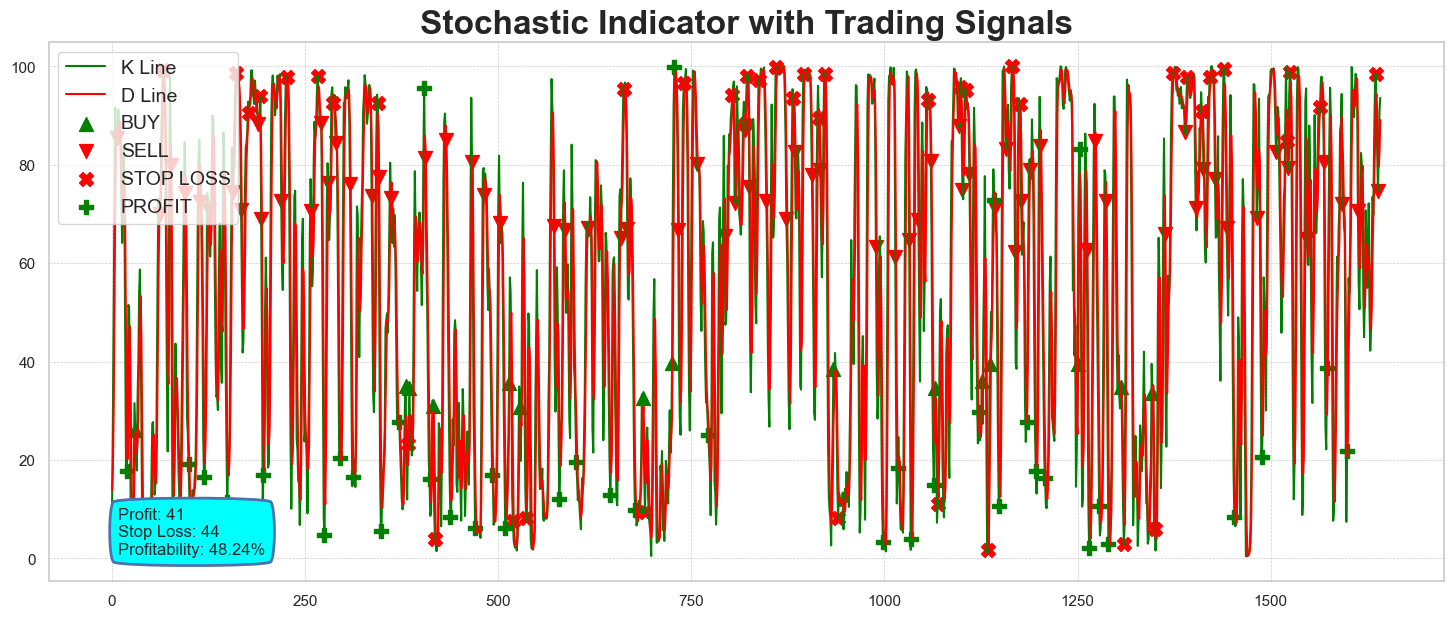

Profit = 41
Stop_loss = 44
PROFITIBLITY 48.23529411764706


In [144]:
plt.figure(figsize=(18,7))
####################################################Visualization###################################
# Plotting the Stochastic lines
plt.plot(df['K_line'], color='green', label='K Line')
plt.plot(df['D_line'], color='red', label='D Line')

# Scatter plots for Buy, Sell, Stop Loss, and Profit signals
plt.scatter(df.index, df['buy'], marker='^', color='green', s=100, label='BUY')
plt.scatter(df.index, df['sell'], marker='v', color='red', s=100, label='SELL')
plt.scatter(df.index, df['Stop_loss'], marker='X', color='red', s=100, label='STOP LOSS')
plt.scatter(df.index, df['Profit'], marker='P', color='green', s=100, label='PROFIT')

# Enhancing legend and title
plt.legend(loc='upper left', fontsize=14)
plt.title('Stochastic Indicator with Trading Signals', fontsize=24, fontweight='bold')

# Adding grid
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Calculating and annotating profitability metrics
profit_count = df['Profit'].count()
stop_loss_count = df['Stop_loss'].count()
profitability = (profit_count / (profit_count + stop_loss_count)) * 100
plt.annotate(f'Profit: {profit_count}\nStop Loss: {stop_loss_count}\nProfitability: {profitability:.2f}%',
             xy=(0.05, 0.05), xycoords='axes fraction', fontsize=12,
             bbox=dict(boxstyle="round4,pad=0.6", fc="cyan", ec="b", lw=2))

plt.show()
print('Profit =',df['Profit'].count())
print('Stop_loss =',df['Stop_loss'].count())
print(f"PROFITIBLITY {(df['Profit'].count()/(df['Profit'].count()+df['Stop_loss'].count()))*100}")


In [145]:
buy=[]
sell=[]
Profit=[]
Stop_loss=[]
position_Buy=None
position_Sell=None

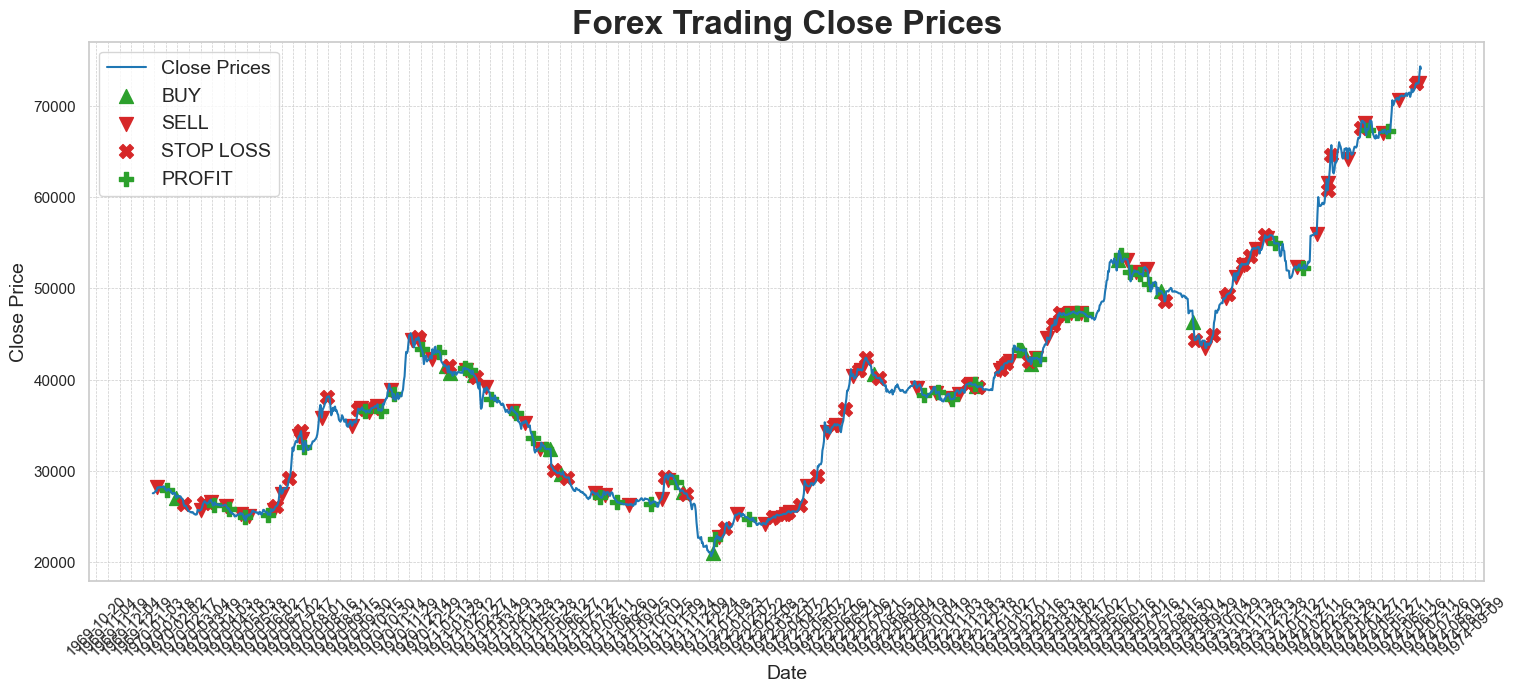

Profit = 41
Stop_loss = 44
PROFITIBLITY 48.23529411764706


In [146]:
for i in range(len(df)):
######################################SIGNAL FOR BUY#######################################################

    if df['K_line'][i]>df['D_line'][i] and df['K_line'][i]<=40 and df['D_line'][i]<=40 and df['K_line'][i]>25 and df['D_line'][i]>25 and position_Buy!="Buy" and position_Sell!="Sell" :
        buy.append(df['Close'][i])
        sell.append(np.nan)
        Stop_loss.append(np.nan)
        Profit.append(np.nan)
        position_Buy="Buy"
            


######################################SIGNAL FOR SELL#######################################################
 
    elif df['K_line'][i]<df['D_line'][i] and df['K_line'][i]>=60 and df['D_line'][i]>=60 and df['K_line'][i]<90 and df['D_line'][i]<90 and position_Sell!="Sell" and position_Buy!="Buy":
        sell.append(df['Close'][i])
        buy.append(np.nan)
        Stop_loss.append(np.nan)
        Profit.append(np.nan)
        position_Sell="Sell"
            
     

######################################SIGNAL FOR BUY_stoc#######################################################
    elif position_Buy=="Buy" :
        if df['D_line'][i]>=70 :
            Stop_loss.append(np.nan)
            Profit.append(df['Close'][i])
            buy.append(np.nan)
            sell.append(np.nan)
            position_Buy=None
            
            
        elif df['D_line'][i]<=20 :
            Stop_loss.append(df['Close'][i])
            Profit.append(np.nan)
            buy.append(np.nan)
            sell.append(np.nan)
            position_Buy=None
            
        else:
            buy.append(np.nan)
            sell.append(np.nan)
            Stop_loss.append(np.nan)
            Profit.append(np.nan)
######################################SIGNAL FOR SELL_stock#######################################################
    elif position_Sell=="Sell":
        if df['D_line'][i]<=30:
            Stop_loss.append(np.nan)
            Profit.append(df['Close'][i])
            buy.append(np.nan)
            sell.append(np.nan)
            position_Sell=None
            
        elif df['D_line'][i]>=90:
            Stop_loss.append(df['Close'][i])
            Profit.append(np.nan)
            buy.append(np.nan)
            sell.append(np.nan)
            position_Sell=None
            
        else:
            buy.append(np.nan)
            sell.append(np.nan)
            Stop_loss.append(np.nan)
            Profit.append(np.nan)
    else:
            buy.append(np.nan)
            sell.append(np.nan)
            Stop_loss.append(np.nan)
            Profit.append(np.nan)
           
df['buy']=buy
df['sell']=sell
df['Stop_loss']=Stop_loss
df['Profit']=Profit
###############################################Visualization########################################
plt.figure(figsize=(18,7))
# Plotting the Close prices with a professional color
plt.plot(df['Close'], label='Close Prices', color='#1f77b4')  # A more professional blue color

# Scatter plots for Buy, Sell, Stop Loss, and Profit signals with refined colors
plt.scatter(df.index, df['buy'], marker='^', color='#2ca02c', s=100, label='BUY')  # Darker green
plt.scatter(df.index, df['sell'], marker='v', color='#d62728', s=100, label='SELL')  # Darker red
plt.scatter(df.index, df['Stop_loss'], marker='X', color='#d62728', s=100, label='STOP LOSS')  # Same as SELL
plt.scatter(df.index, df['Profit'], marker='P', color='#2ca02c', s=100, label='PROFIT')  # Same as BUY

# Enhancing legend and title
plt.legend(loc='upper left', fontsize=14)
plt.title('Forex Trading Close Prices', fontsize=24, fontweight='bold')

# Improving grid and axes
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Close Price', fontsize=14)

# Format the x-axis to display dates (if applicable)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=15))  # Adjust interval as needed
plt.xticks(rotation=45)
plt.show()
print('Profit =',df['Profit'].count())
print('Stop_loss =',df['Stop_loss'].count())
print(f"PROFITIBLITY {(df['Profit'].count()/(df['Profit'].count()+df['Stop_loss'].count()))*100}")